In [1]:
import os
import time
import random
import numpy as np
from matplotlib import cm
from datetime import datetime
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.neighbors import KNeighborsRegressor

import active_learning_code_20220325

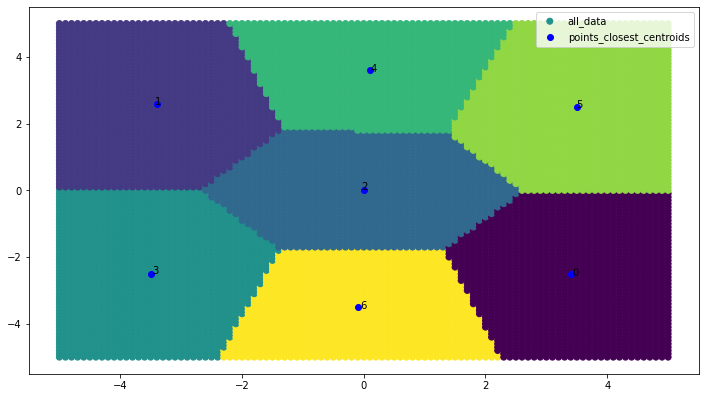

In [3]:
def plot_2D(plot_size, x10, x20, all_true_y, noised_all_y, x_train, y_train, obj_f, random_seed, noise_level):
        ax = plt3d.Axes3D(plt.figure(figsize=plot_size))
        surf = ax.plot_surface(x10, x20, all_true_y.reshape(len(x10), -1),
                label='all_true_y', cmap=cm.coolwarm, linewidth=0.1,
                antialiased=False, alpha=0.8)
        surf2 = ax.plot_surface(x10, x20, noised_all_y.reshape(len(x10), -1),
                label='noised_all_true_y', linewidth=0.1, antialiased=False, alpha=0.08)
        plt.colorbar(surf, shrink=0.5, aspect=5)
        ax.scatter(x_train[:, 0], x_train[:, 1], obj_f(x_train), color='blue', label='training_point_in_real')
        ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='red', label='training_point_in_noise')
        for i in range(len(x_train)):
            ax.text(x_train[i, 0], x_train[i, 1], y_train[i], '%s' % (str(i+1)), alpha=1, size=30, zorder=1, color='k')
        ax.set_title('Random seed in {} and noise level in {}%'.format(random_seed, 100*noise_level))
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')
        stamp = datetime.utcnow().strftime('%Y%m%d-%H%M%S-%f')[:-3]
        plt.savefig(''.join([stamp, '_2D_random_seed_in_', str(random_seed), '.png']))
        plt.show()

        plt.figure(figsize=plot_size)
        surf3 = plt.contourf(x10, x20, noised_all_y.reshape(number_of_range_points, -1), cmap=cm.coolwarm, antialiased=False)
        plt.colorbar(surf3, shrink=0.5, aspect=5)
        plt.scatter(x_train[:, 0], x_train[:, 1], s=30,  marker='x', color='black', label='training_points')
        for i in range(len(x_train)):
            plt.annotate(str(i+1), xy=(x_train[i, 0], x_train[i, 1]), xytext=(x_train[i, 0], x_train[i, 1]))
        plt.legend()
        plt.title('Contour graph random seed in {} and noise level in {}%'.format(random_seed, 100*noise_level))
        stamp = datetime.utcnow().strftime('%Y%m%d-%H%M%S-%f')[:-3]
        plt.savefig(''.join([stamp, '_contourf_2D_random_seed_in_', str(random_seed), '.png']))
        plt.show()


plot_size = (12, 6.75)  # The size of all the plots
x_d = 2  # Used to define the number of variables in input layer
y_d = 1 # Used for define the number of variables in output layer

number_of_range_points = 101
x_mini, x_maxi = np.array(-5), np.array(5)
obj_f = active_learning_code_20220325.function_generator(x_mini, x_maxi, dimension=x_d, random_seed=30)

x_range = np.linspace(x_mini, x_maxi, number_of_range_points)
x10, x20 = np.meshgrid(x_range, x_range)
x1, x2 = x10.ravel(), x20.ravel()
coordinate = np.zeros([len(x1), 2])
for i in range(len(x1)):
    coordinate[i] = np.array([x1[i], x2[i]])
x_range = coordinate

all_true_y = obj_f(x_range)
max_distance_in_y = active_learning_code_20220325.max_distance(all_true_y)

number_of_training_points = 7
train_indices = active_learning_code_20220325.indices_by_kmeans_process(x_range, number_of_training_points, [all_true_y], fsize=plot_size)


Random seed:  30 , noise portion:  0.05


C:\Users\Fu\AppData\Local\Temp\ipykernel_14392\3926609815.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = plt3d.Axes3D(plt.figure(figsize=plot_size))


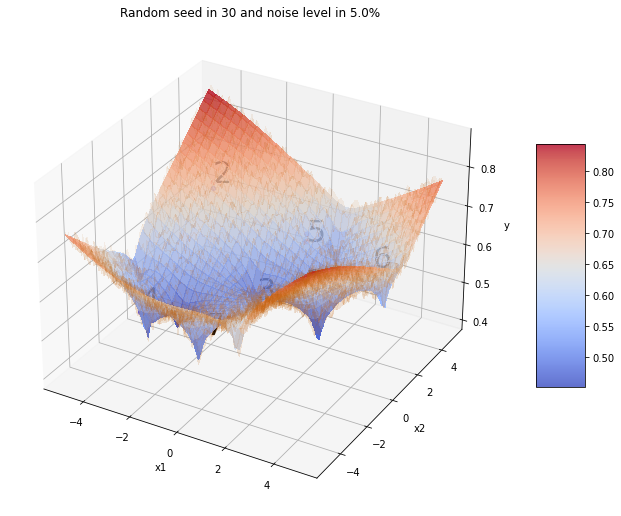

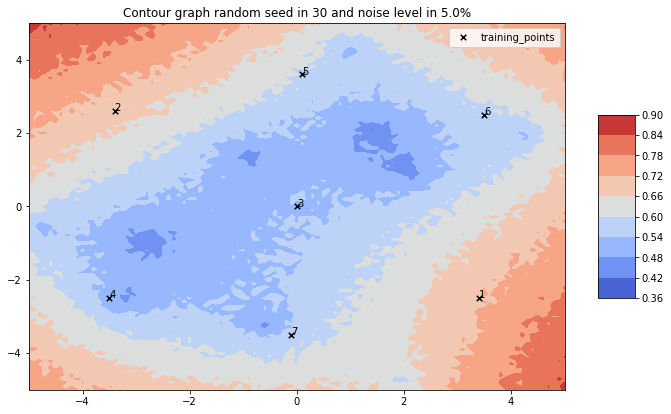

In [5]:
noise_level  = 0.05
rand_seed = 30
print("Random seed: ", rand_seed, ', noise portion: ', noise_level)
noise_distance = noise_level * max_distance_in_y

# Generate the noised y and get the x_train and y_train as the training dataset
np.random.seed(rand_seed)
noised_all_y = all_true_y + np.random.uniform(-1.0, 1.0, size=all_true_y.shape) * noise_distance
x_train, y_train = x_range[train_indices], noised_all_y[train_indices]

# Calculate the termination_mse_threshold and the maximum allowed prediction error
termination_mse_threshold = (1/12) * np.power(noise_level, 2) * np.power(max_distance_in_y, 2)
max_allowed_pred_error =  noise_level * max_distance_in_y

# Plotting the function and the noised (noise free) training data points
plot_2D(plot_size, x10, x20, all_true_y, noised_all_y, x_train, y_train, obj_f, rand_seed, noise_level)

----------------------------------------------------------
The 1st prediction by QBC. 

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


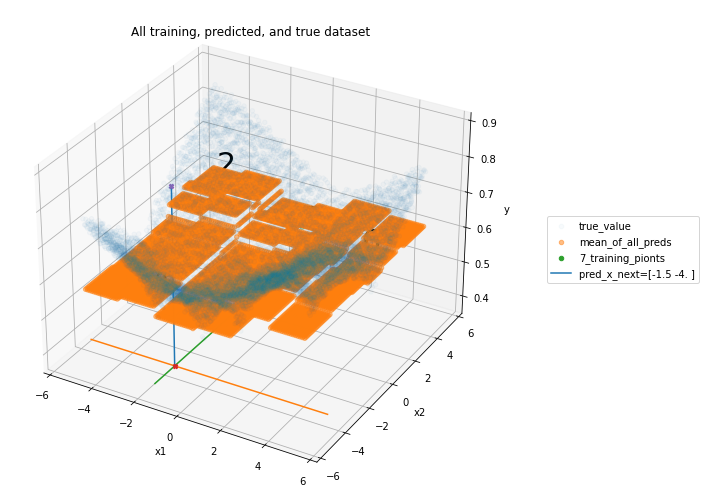

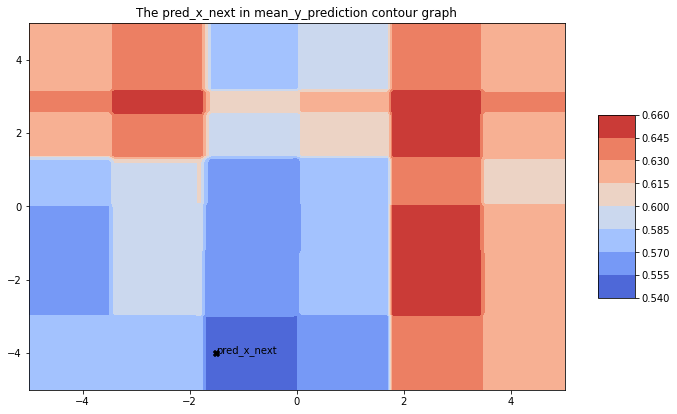

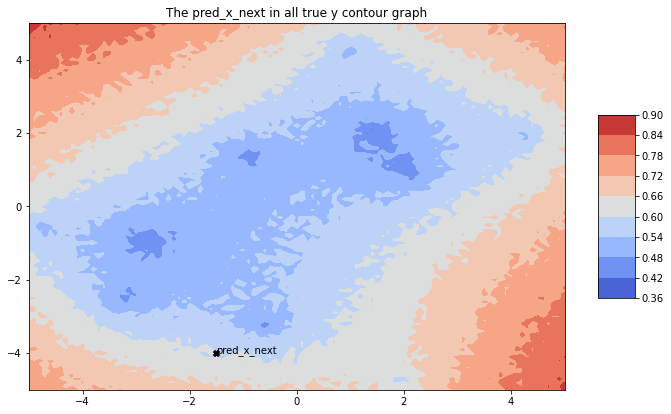

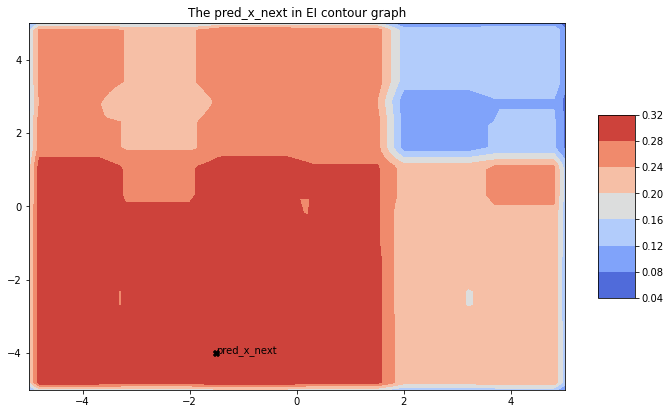

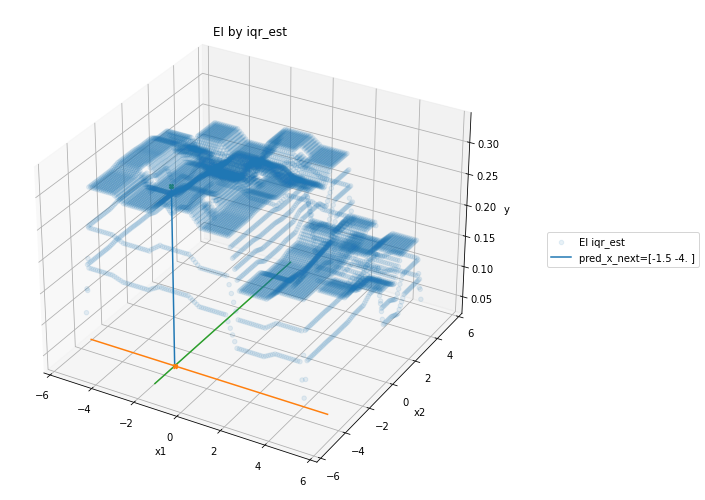

The predicted x_next=[-1.5 -4. ] with EI of y in 0.3184265506436895.
Extended x_train: [[ 3.4 -2.5]
 [-3.4  2.6]
 [ 0.   0. ]
 [-3.5 -2.5]
 [ 0.1  3.6]
 [ 3.5  2.5]
 [-0.1 -3.5]
 [-1.5 -4. ]]
Extended y_train: [0.69271378 0.69976274 0.53192296 0.52272689 0.57418639 0.59908119
 0.54927445 0.59762941]
----------------------------------------------------------
The 2th prediction by QBC. 

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


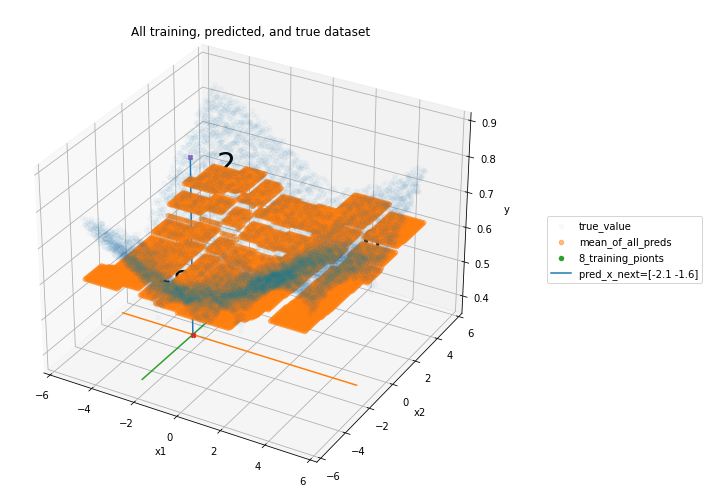

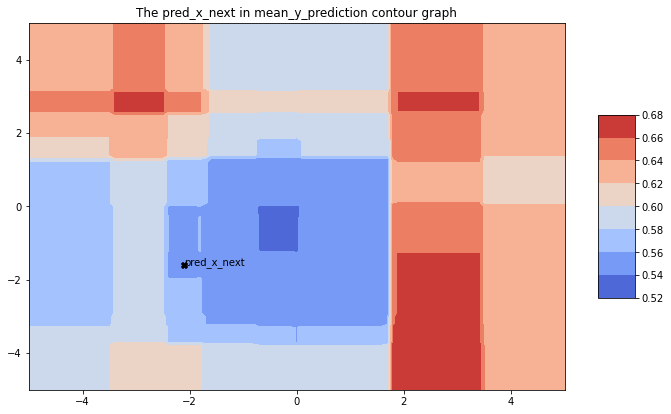

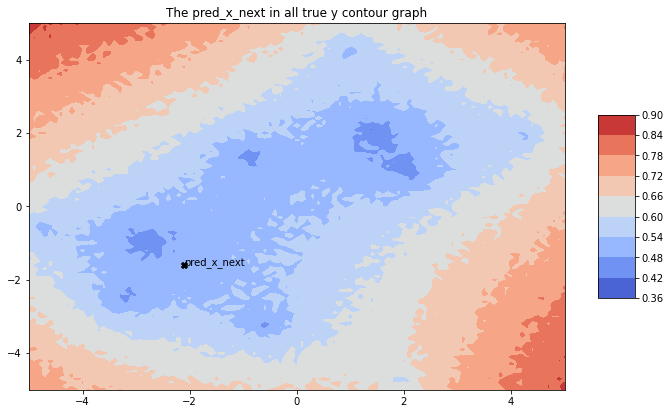

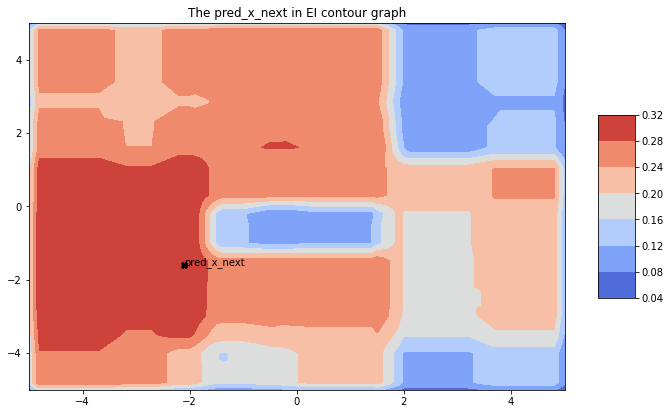

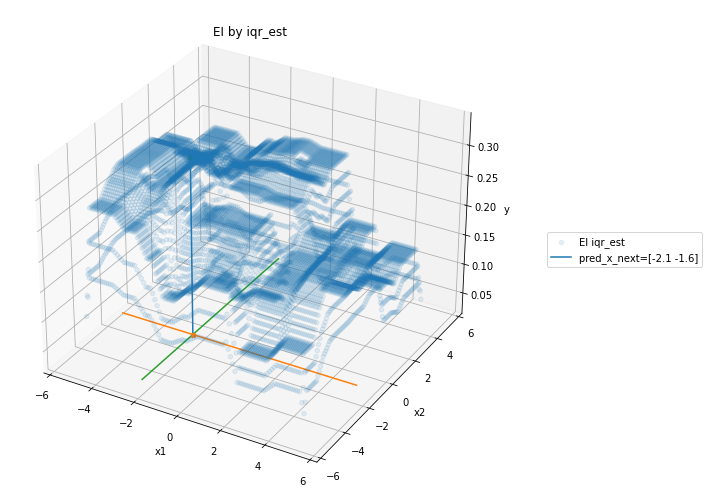

The predicted x_next=[-2.1 -1.6] with EI of y in 0.31837096648947705.


[[-1.5, -4.0], [-2.0999999999999996, -1.5999999999999996]]

In [12]:
# 2D test
predict_n_steps_further = 2  # Control the number of prediction steps.
show_plot = True # The policy of showing the plot in the user interface or not.

solver = active_learning_code_20220325.ActiveLearningSolver() 
model, model_type, kargs  = solver.define_a_model(x_d=x_d, y_d=y_d)   
solver.fit_models(x_train=x_train, y_train=y_train, extra_tree_method='tree', tau=['mae', noise_distance])

solver.predict_n_steps_by_QBC(true_y_next=False, n_step=predict_n_steps_further, orig_func=noised_all_y, 
                              x_range=x_range, pdf_type='iqr', plot_size=plot_size, show_plot=show_plot,
                               aqf_plot=True, threshold=0.01, epsilon=0.6)

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


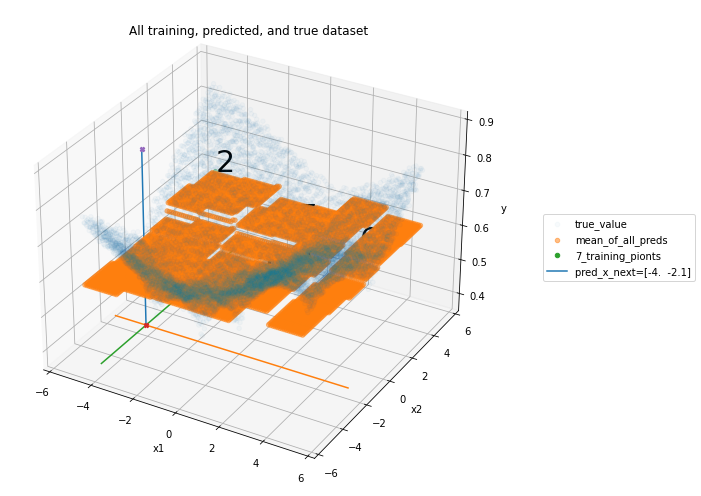

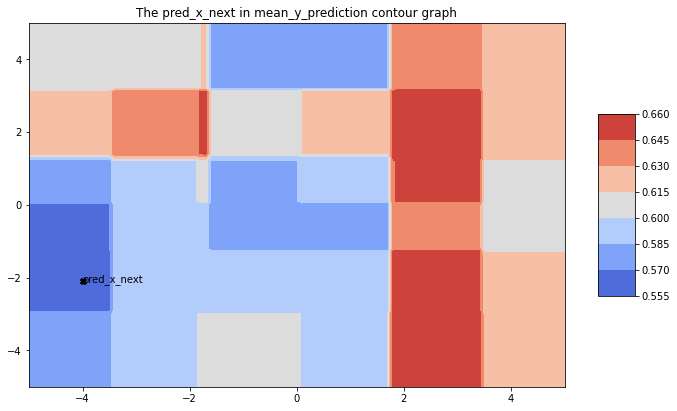

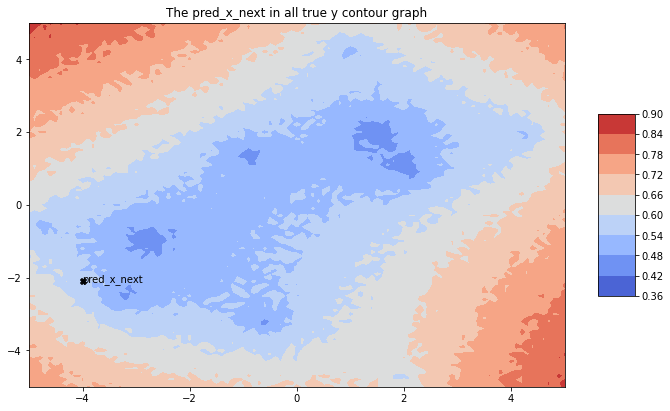

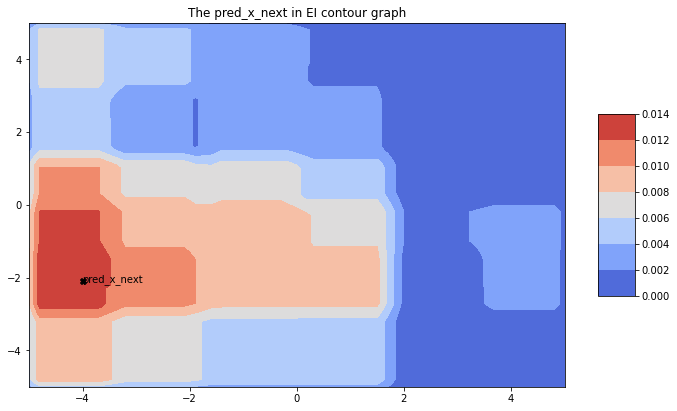

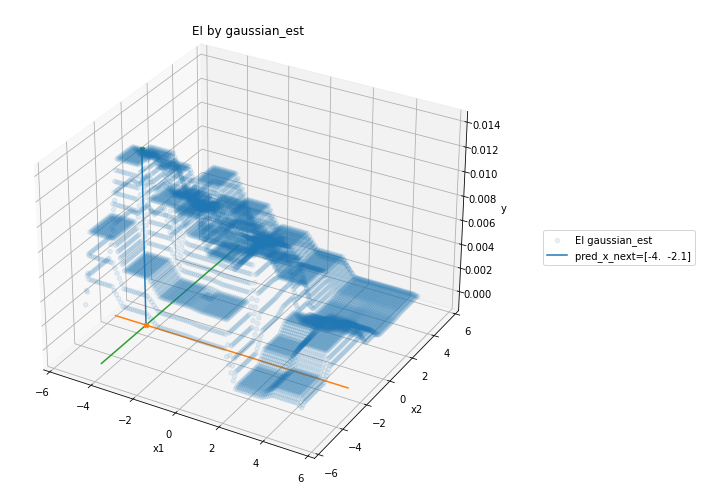

The predicted x_next=[-4.  -2.1] with EI of y in 0.013152960170707861.


[[-4.0, -2.0999999999999996]]

In [13]:
solver = active_learning_code_20220325.ActiveLearningSolver()

for i in range(8):    
    model, model_type, kargs  = solver.define_a_model(
            x_d=2, y_d=1, model_type=DecisionTreeRegressor, criterion='squared_error', max_depth=None,
            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
            random_state=i, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

    solver.add_model_to_QBC(model, model_type, kargs)
    
solver.fit_models(x_train=x_train, y_train=y_train, booststraping='all_models', 
                  update_model={'Model_1_Model_0':{'min_samples_split': random.choice([3,5])
                                        ,'min_samples_leaf': lambda x: random.choice([1,2])
                                        ,'max_leaf_nodes=None': lambda x: random.choice([3,5])
                                        ,'max_depth': lambda x: random.choice([None,5])
                                        }
                                })
solver.predict_a_step_by_QBC(x_range, y_range=noised_all_y, pdf_type='Gaussian',
                              plot_size=(12, 6.7), show_plot=True, 
                              aqf_plot=True, threshold=0.01, epsilon=0.3)

Extended x_train: [[ 3.4 -2.5]
 [-3.4  2.6]
 [ 0.   0. ]
 [-3.5 -2.5]
 [ 0.1  3.6]
 [ 3.5  2.5]
 [-0.1 -3.5]
 [-4.  -2.1]]
Extended y_train: [0.69271378 0.69976274 0.53192296 0.52272689 0.57418639 0.59908119
 0.54927445 0.56028814]
----------------------------------------------------------
The 2th prediction by QBC. 

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


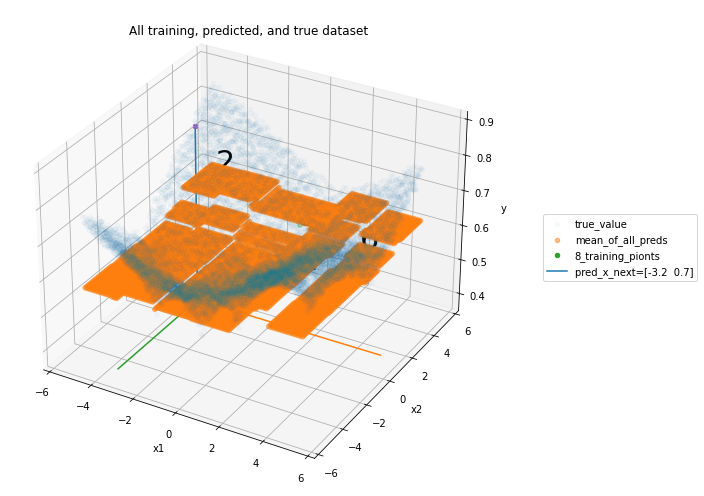

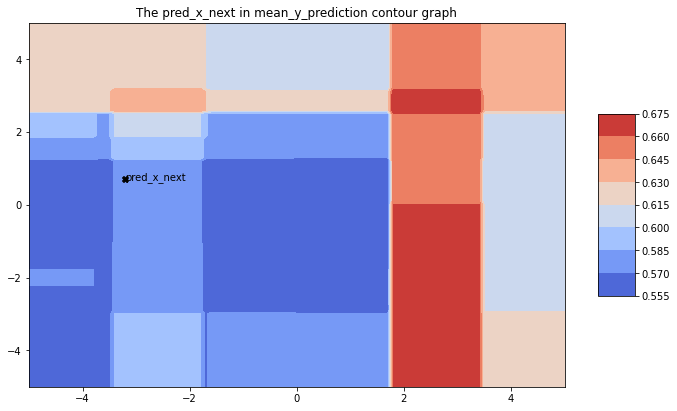

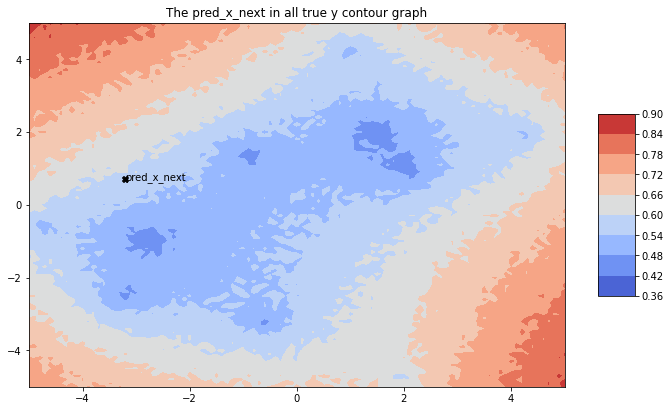

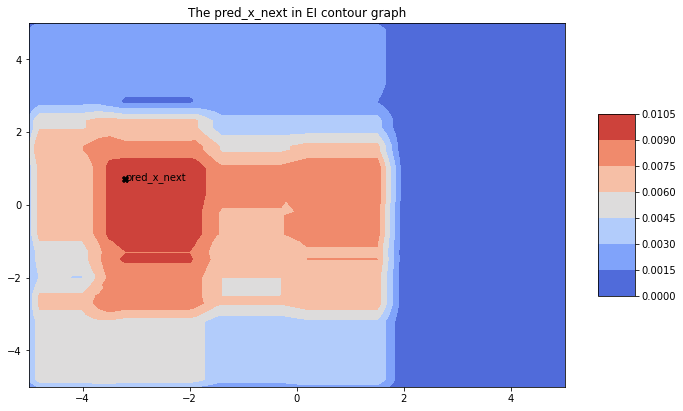

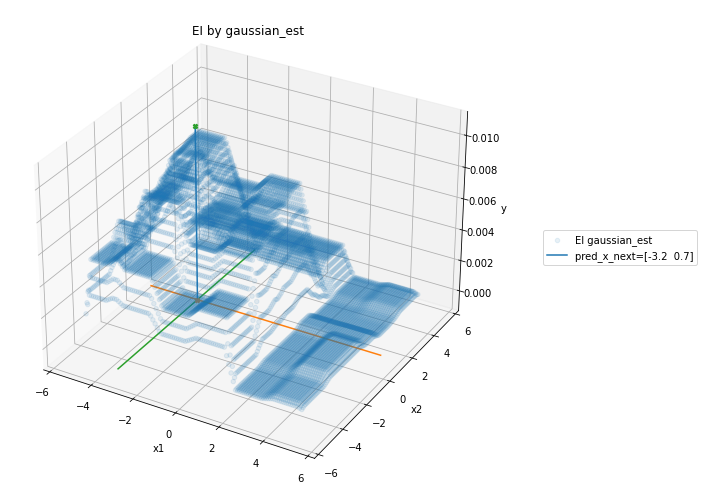

The predicted x_next=[-3.2  0.7] with EI of y in 0.010168217617973062.


In [14]:
QBC = solver.predict_n_steps_by_QBC(true_y_next=False, n_step=1, orig_func=noised_all_y, x_range=x_range,
                                    pdf_type='Gaussian', plot_size=(12, 6.7), show_plot=True, aqf_plot=True,
                                    threshold=0.01, epsilon=0.6)

In [16]:
solver = active_learning_code_20220325.ActiveLearningSolver()
  
for i in range(3):
    model, model_type, kargs  = solver.define_a_model(
            x_d=2, y_d=1, model_type=DecisionTreeRegressor, criterion='squared_error', max_depth=None,
            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
            random_state=i, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    solver.add_model_to_QBC(model, model_type, kargs)

model, model_type, kargs  = solver.define_a_model(
    x_d=2, y_d=1, model_type=AdaBoostRegressor, base_estimator=DecisionTreeRegressor(max_depth=None), n_estimators=300, random_state=3)
solver.add_model_to_QBC(model, model_type, kargs)

model, model_type, kargs  = solver.define_a_model(
    x_d=2, y_d=1, model_type=RandomForestRegressor, n_estimators=100, max_depth=None, random_state=2)
solver.add_model_to_QBC(model, model_type, kargs)

kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(0.1**(-1*i), 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(0.1**(5-i), 1e1))
model, model_type, kargs  = solver.define_a_model(
    x_d=2, y_d=1, model_type=GaussianProcessRegressor, kernel=kernel, n_restarts_optimizer=9+i)
solver.add_model_to_QBC(model, model_type, kargs)

solver.fit_models(x_train=x_train, y_train=y_train, booststraping=[lambda x: x+2, 1, 0], 
                  update_model={'Model_1_Model_0':{'min_samples_split': lambda x: random.choice([2,3])
                                        ,'min_samples_leaf': lambda x: random.choice([1,2])
                                        ,'max_leaf_nodes=None': lambda x: random.choice([3,5])
                                        ,'max_depth': lambda x: random.choice([None,5])}
                                })   

C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Extended x_train: [[ 3.4 -2.5]
 [-3.4  2.6]
 [ 0.   0. ]
 [-3.5 -2.5]
 [ 0.1  3.6]
 [ 3.5  2.5]
 [-0.1 -3.5]
 [-3.2  1.5]
 [-3.6 -0.7]]
Extended y_train: [0.69271378 0.69976274 0.53192296 0.52272689 0.57418639 0.59908119
 0.54927445 0.62623595 0.52856034]


C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


----------------------------------------------------------
The 3th prediction by QBC. 

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


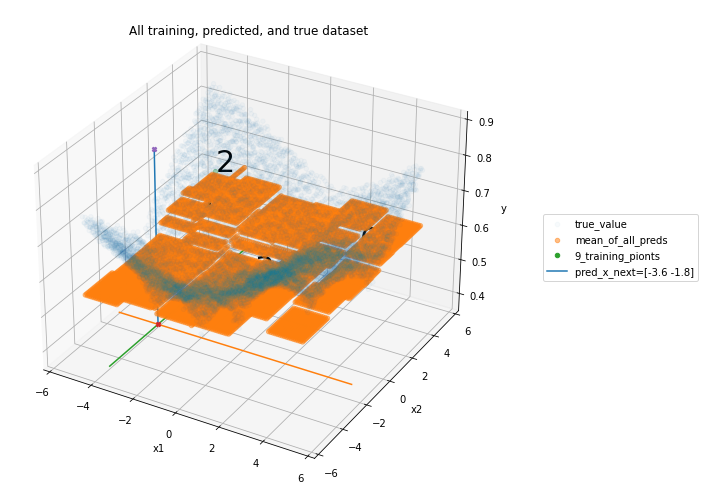

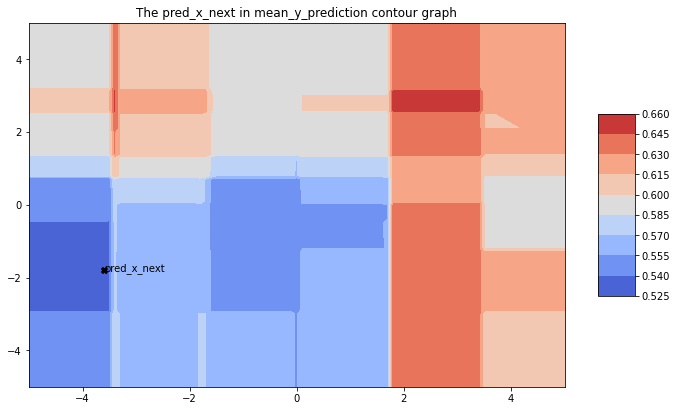

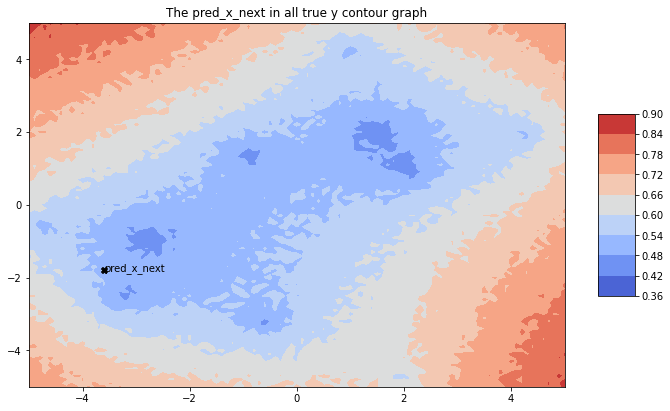

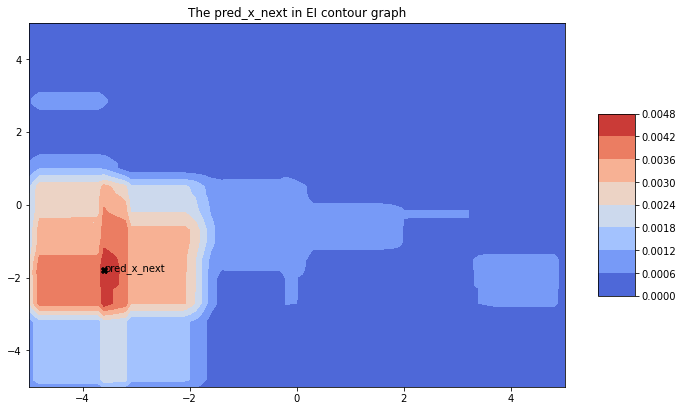

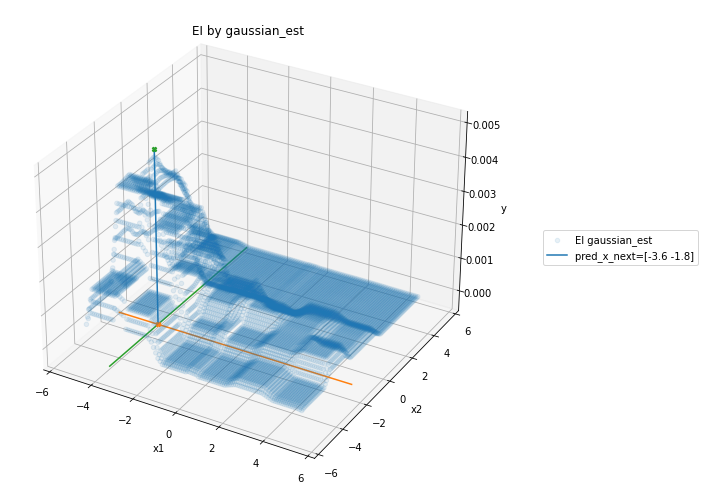

The predicted x_next=[-3.6 -1.8] with EI of y in 0.007547176749126885.
Extended x_train: [[ 3.4 -2.5]
 [-3.4  2.6]
 [ 0.   0. ]
 [-3.5 -2.5]
 [ 0.1  3.6]
 [ 3.5  2.5]
 [-0.1 -3.5]
 [-3.2  1.5]
 [-3.6 -0.7]
 [-3.6 -1.8]]
Extended y_train: [0.69271378 0.69976274 0.53192296 0.52272689 0.57418639 0.59908119
 0.54927445 0.62623595 0.52856034 0.54520398]


C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


----------------------------------------------------------
The 4th prediction by QBC. 

C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


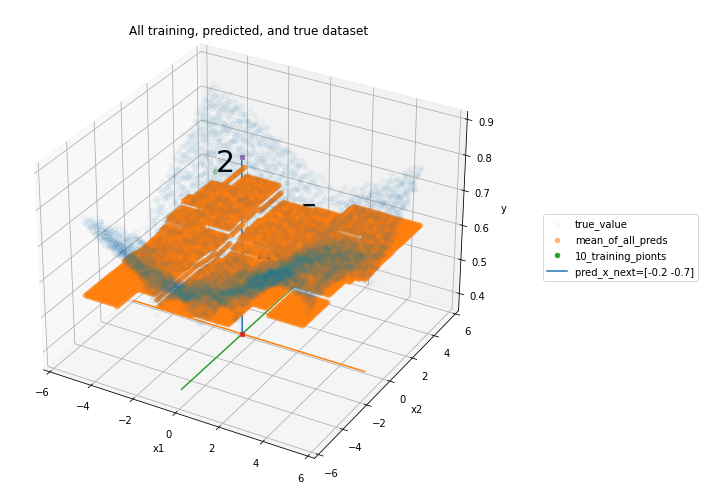

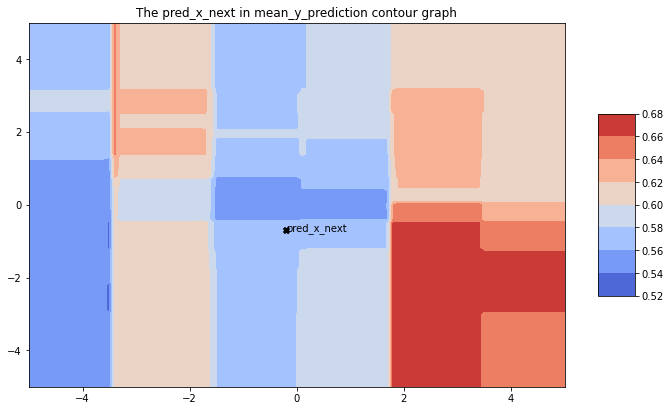

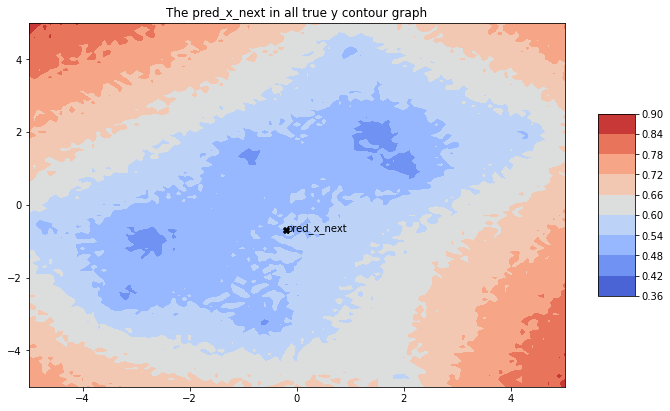

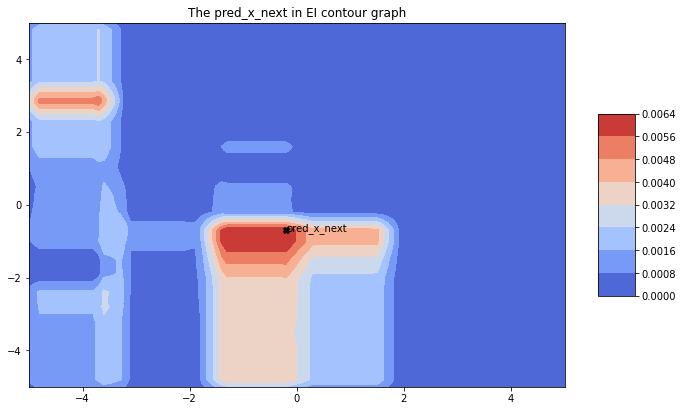

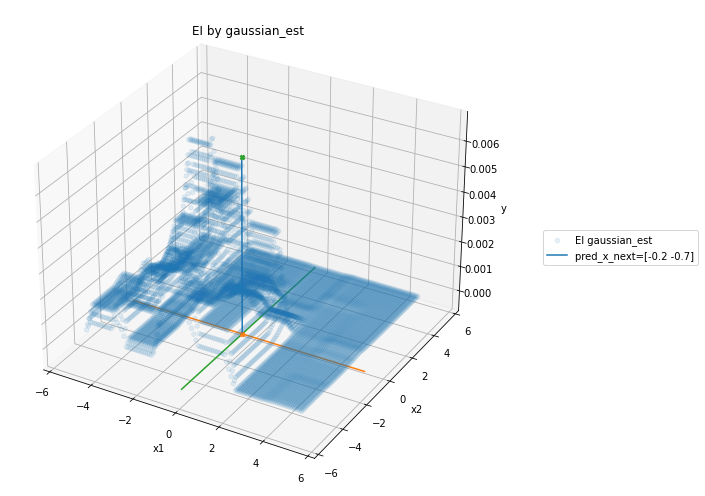

The predicted x_next=[-0.2 -0.7] with EI of y in 0.0063400248896751076.


In [19]:
predict_n_steps_further = 2
QBC = solver.predict_n_steps_by_QBC(true_y_next=False, n_step=predict_n_steps_further, orig_func=noised_all_y,
                                    x_range=x_range, pdf_type='Gaussian', plot_size=(12, 6.7), show_plot=True,
                                    aqf_plot=True, threshold=0.01, epsilon=0.6)

Predict by Gaussian Process 2 times.
The predicted next x by Gaussian Process is [[-2.2 -2.6]] with the maximumExpected_Improvement in 0.012369972151457714.


C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


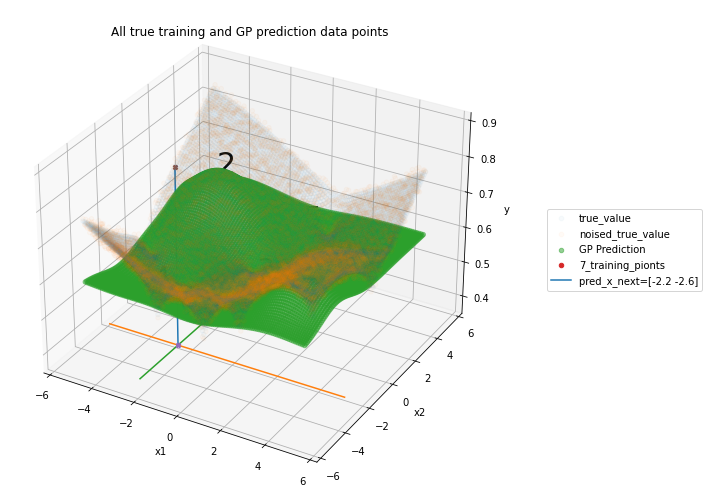

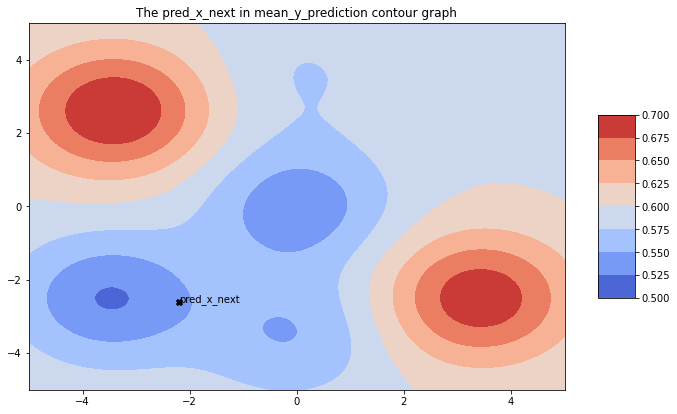

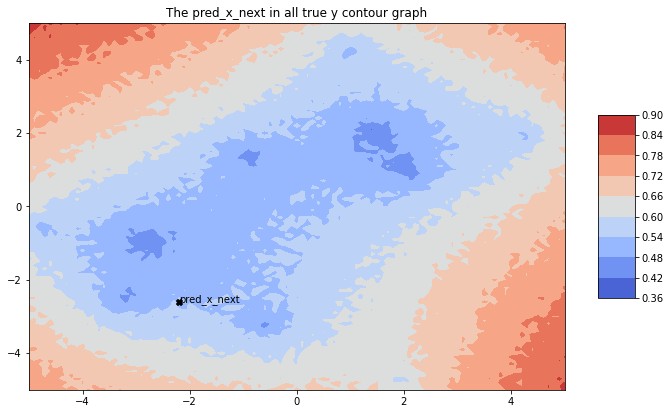

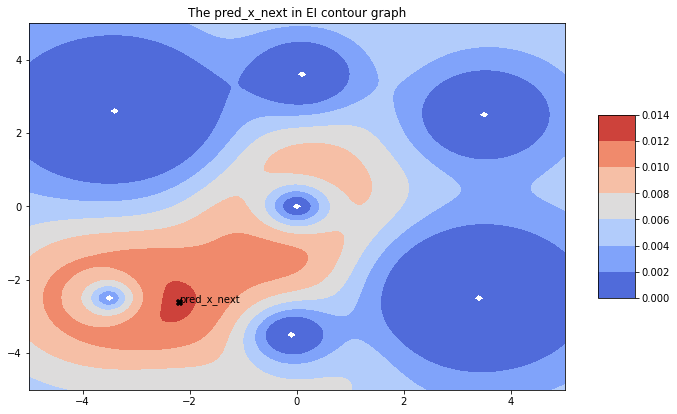

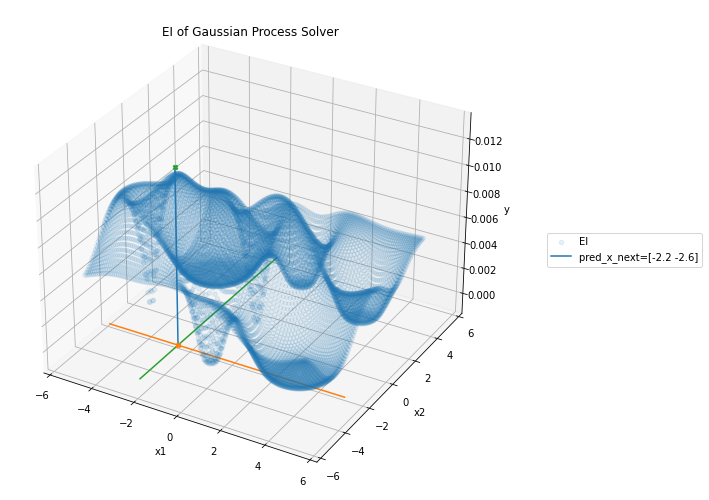

The predicted next x by Gaussian Process is [[-3.8 -4.1]] with the maximumExpected_Improvement in 0.011202865327942877.


C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


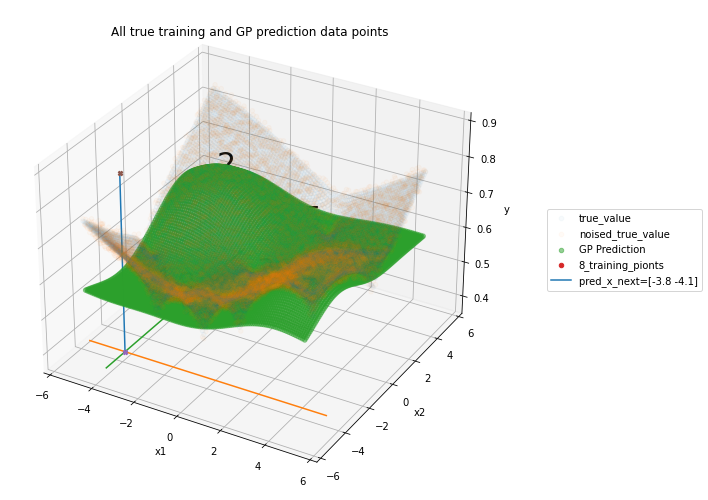

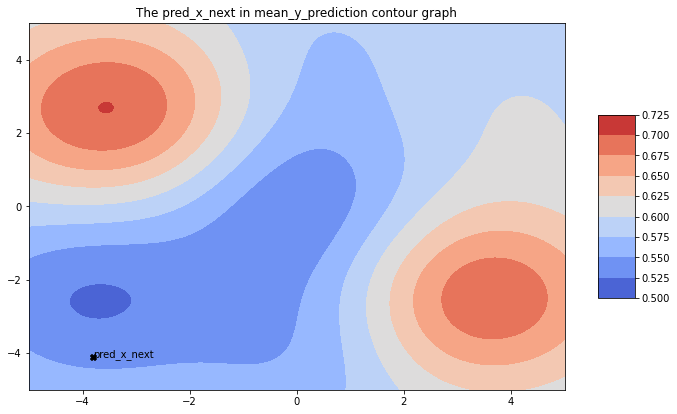

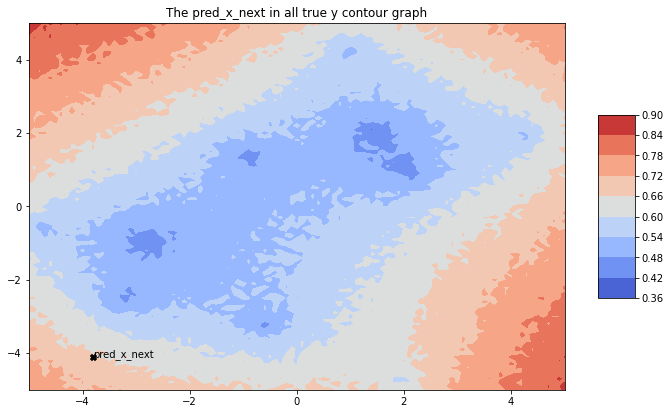

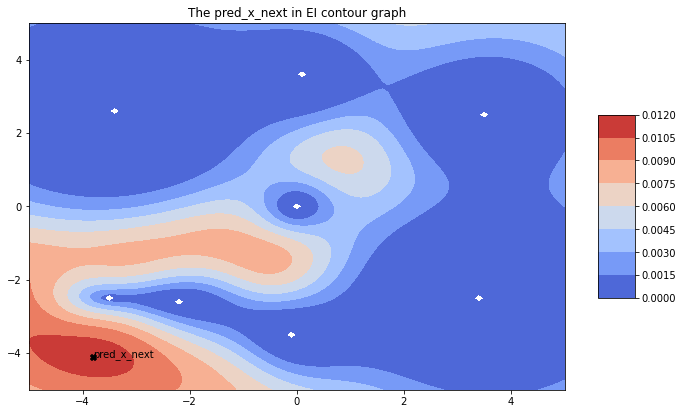

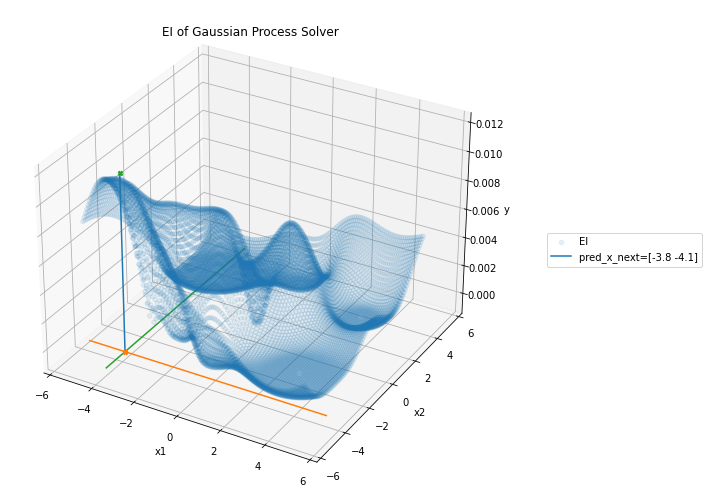

Parameters are saved at 20220404-102611-372
Predict_by_GP: [([[-2.1999999999999997, -2.5999999999999996]], 0.012369972151457714), ([[-3.8, -4.1]], 0.011202865327942877)]


In [20]:
print('Predict by Gaussian Process {} times.'.format(predict_n_steps_further))
GP = solver.predict_by_GP(x_train, y_train, x_range, n_step=predict_n_steps_further, aqf_plot=True,
                plot_size=plot_size, show_plot=show_plot, y_true_in_x_range=[all_true_y, noised_all_y],
                orig_func=obj_f, constant_value=1.0, constant_value_bounds=(noise_distance, 1000.0),
                length_scale_bounds=(noise_distance, 1000.0), length_scale=1.0, optimizer='fmin_l_bfgs_b',
                n_restarts_optimizer=30, alpha=1e-10, normalize_y=True)
print('Predict_by_GP:', GP)

Predict by random guess 2 times.
The predicted x_next by random guess is [ 4.2 -1.5], and the corresponding y of x_next is 0.6946726004729409.


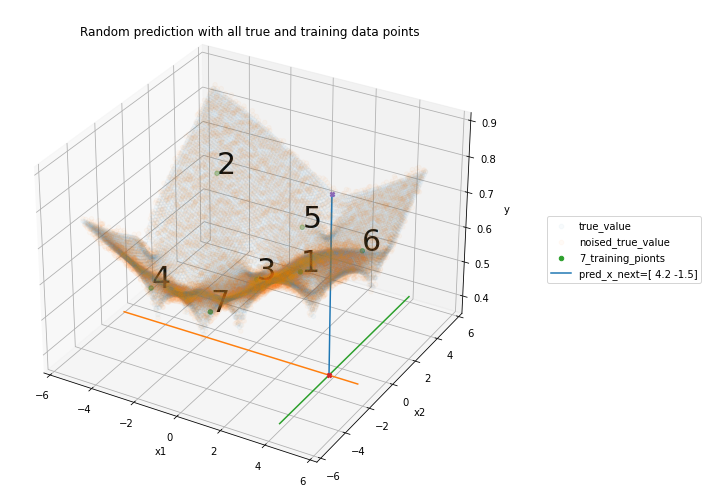

The predicted x_next by random guess is [ 2.3 -3.1], and the corresponding y of x_next is 0.664590482301416.


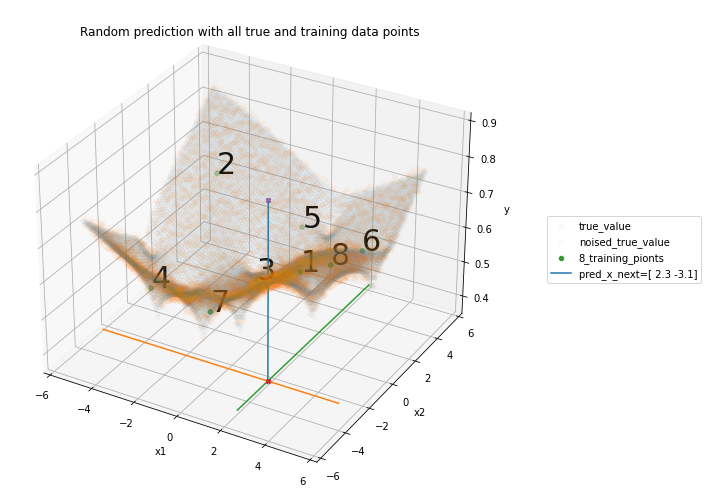

Parameters are saved at 20220404-102626-245
Predict_by_random_guess: [([[4.200000000000001, -1.5]], [0.6946726004729409]), ([[2.3000000000000007, -3.0999999999999996]], [0.664590482301416])]


In [21]:
# Use the random guess solver to predict 2 steps
print('Predict by random guess {} times.'.format(predict_n_steps_further))
rand = solver.predict_by_random_guess(x_train=x_train, y_train=y_train, x_range=x_range,
                                      n_step=predict_n_steps_further, plot_size=plot_size,
                                      y_range=[all_true_y, noised_all_y], show_plot=show_plot)
print('Predict_by_random_guess:', rand)

The true y_min is 0.41425759931270545, but the accepted min values (y_min + noise_distance) is 0.4360436456528819.
There are 8 accepted minimum points over x_range.
QBC_Solver predict 4 steps, and there are 0 predictions of x_next within the accepted minimum range.
Step_None is the first time of the solver having x_next within the accepted minimum range.


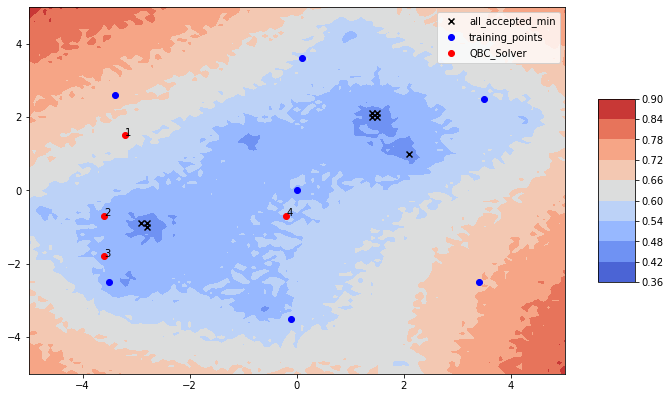

Gaussian_Process_Solver predict 2 steps, and there are 0 predictions of x_next within the accepted minimum range.
Step_None is the first time of the solver having x_next within the accepted minimum range.


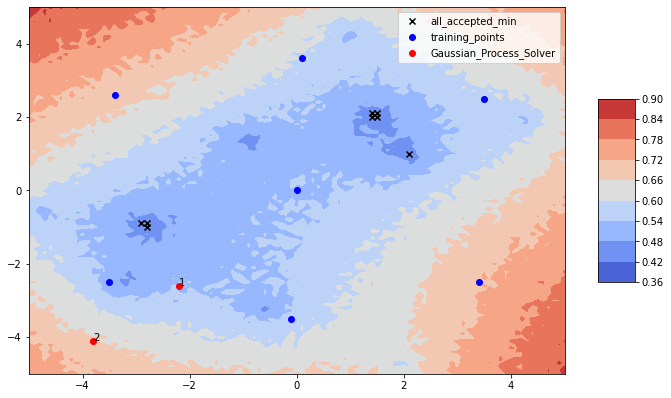

Random_Guess_Solver predict 2 steps, and there are 0 predictions of x_next within the accepted minimum range.
Step_None is the first time of the solver having x_next within the accepted minimum range.


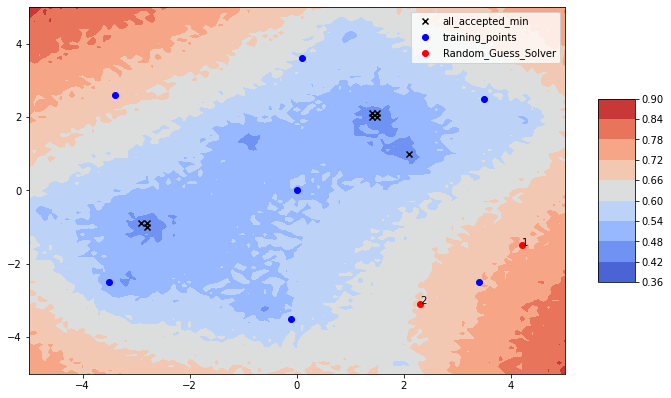

PSO_Solver predict 2 steps, and there are 0 predictions of x_next within the accepted minimum range.
Step_None is the first time of the solver having x_next within the accepted minimum range.


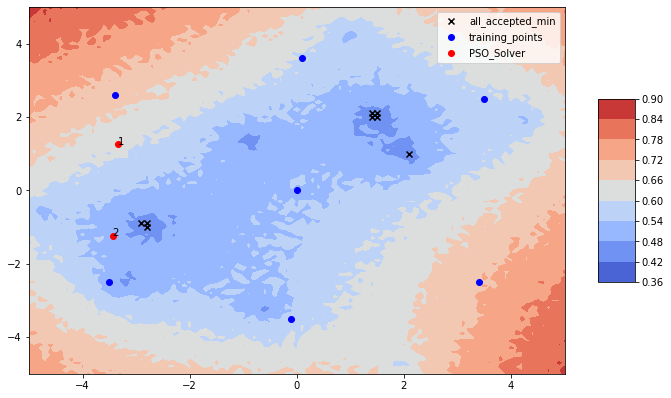

In [22]:
message = solver.result_analysis(x_range, noised_all_y, obj_f, x_train, y_train, figsize=plot_size,
                                 show_plot=show_plot, noise_distance=noise_distance)